In [1]:
#importing libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
os.chdir('C:/Users/emrem/OneDrive/Masaüstü/YTÜ Yüksek/İst.Bilg.Uyg/2.odev/')
data = pd.read_excel('izmveri.xls', sheet_name='izmveri')

In [3]:
#data type review
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 20 columns):
Cadde_no            824 non-null object
Tarih               627 non-null datetime64[ns]
saat                824 non-null object
so2                 824 non-null float64
toz                 824 non-null float64
CO                  824 non-null float64
NO                  824 non-null float64
NO2                 824 non-null float64
NOx                 824 non-null float64
O3                  824 non-null float64
ruzgar_hizi         824 non-null float64
ruzgar_yonu         824 non-null float64
sicaklik            824 non-null float64
nem                 824 non-null float64
basinc              824 non-null float64
kabin_sicakligi     824 non-null float64
Motorsiklet         824 non-null int64
otomobil            824 non-null int64
minibus_kamyonet    824 non-null int64
otobus_kamyon       824 non-null int64
dtypes: datetime64[ns](1), float64(13), int64(4), object(2)
memory usage: 128.

In [4]:
data.head()

,Cadde_no,Tarih,saat,so2,toz,CO,NO,NO2,NOx,O3,ruzgar_hizi,ruzgar_yonu,sicaklik,nem,basinc,kabin_sicakligi,Motorsiklet,otomobil,minibus_kamyonet,otobus_kamyon
0,MithatPasa,2008-02-15,00:00:00,20.0,99.3,1745.6,86.7,64.5,151.2,3.7,0.3,198.4,4.8,63.2,1025.4,16.5,7,649,61,15
1,MithatPasa,2008-02-15,01:00:00,20.0,108.3,1888.8,100.2,62.9,163.1,3.6,0.4,110.7,5.1,60.7,1025.4,16.4,7,311,50,0
2,MithatPasa,2008-02-15,02:00:00,15.2,49.3,1268.9,34.0,58.3,92.4,4.1,0.6,110.9,5.6,55.7,1025.3,16.4,1,226,18,0
3,MithatPasa,2008-02-15,03:00:00,14.4,52.0,1084.8,8.0,52.1,60.2,5.0,0.4,188.5,4.9,57.3,1025.1,16.4,1,104,9,0
4,MithatPasa,2008-02-15,04:00:00,14.2,56.9,1282.6,4.8,48.3,53.1,4.2,0.3,190.3,3.8,63.1,1024.9,16.4,1,91,9,0


In [5]:
# counting null values
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Tarih,197,23.907767
otobus_kamyon,0,0.000000
minibus_kamyonet,0,0.000000
saat,0,0.000000
so2,0,0.000000
toz,0,0.000000
CO,0,0.000000
NO,0,0.000000
NO2,0,0.000000
NOx,0,0.000000


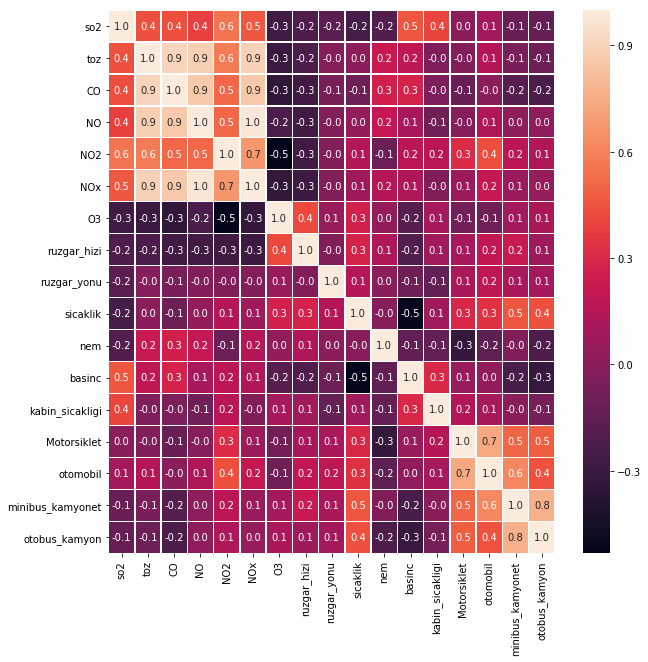

In [5]:
#correlation heatmap
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [6]:
#chemical variables
chemical = data.iloc[:,3:9]
chemical.head()

,so2,toz,CO,NO,NO2,NOx
0,20.0,99.3,1745.6,86.7,64.5,151.2
1,20.0,108.3,1888.8,100.2,62.9,163.1
2,15.2,49.3,1268.9,34.0,58.3,92.4
3,14.4,52.0,1084.8,8.0,52.1,60.2
4,14.2,56.9,1282.6,4.8,48.3,53.1


In [16]:
#PCA with chemical variables
chemical = data.iloc[:,3:9]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
chemical = sc.fit_transform(chemical)  

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  
chemical = pca.fit_transform(chemical)  
explained_variance = pca.explained_variance_ratio_ 

explained_variance

array([0.7334875 , 0.14657638, 0.07280675])

In [18]:
print(pd.DataFrame(pca.components_,columns=data.iloc[:,3:9].columns,index = ['PC-1','PC-2','PC-3']))

           so2       toz        CO        NO       NO2       NOx
PC-1  0.283736  0.447884  0.435749  0.442931  0.345757  0.461823
PC-2  0.746802 -0.196567 -0.228801 -0.294615  0.494818 -0.140201
PC-3  0.591931  0.062332  0.210619  0.068538 -0.763545 -0.116936


In [39]:
data['PCA1_C'] = chemical[:, 0]

In [40]:
#physical variables
physical  = data.iloc[:,10:13] 
physical.head()

,ruzgar_hizi,ruzgar_yonu,sicaklik
0,0.3,198.4,4.8
1,0.4,110.7,5.1
2,0.6,110.9,5.6
3,0.4,188.5,4.9
4,0.3,190.3,3.8


In [38]:
#PCA with physical variables
physical  = data.iloc[:,10:13] 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
physical  = sc.fit_transform(physical)  

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  
physical  = pca.fit_transform(physical)  
explained_variance = pca.explained_variance_ratio_ 

explained_variance

array([0.32991807, 0.26737381, 0.24069521])

In [22]:
data['PCA1_P'] = physical[:, 0]

In [23]:
#vehicle variables
vehicle  = data.iloc[:,16:20] 
vehicle .head()

,Motorsiklet,otomobil,minibus_kamyonet,otobus_kamyon
0,7,649,61,15
1,7,311,50,0
2,1,226,18,0
3,1,104,9,0
4,1,91,9,0


In [24]:
#PCA with vehicle variables
vehicle  = data.iloc[:,16:20] 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
vehicle  = sc.fit_transform(vehicle)  

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  
vehicle = pca.fit_transform(vehicle)  
explained_variance = pca.explained_variance_ratio_ 

explained_variance

array([0.69564519, 0.18426214, 0.08026801])

In [25]:
data['PCA1_V'] = vehicle[:, 0]

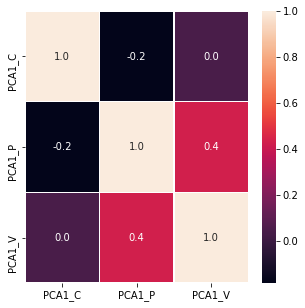

In [26]:
#Correlation heatmap for PCA variables
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.iloc[:,20:23] .corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [27]:
#Linear Regression Model
import statsmodels.api as sm 
X = data[["PCA1_P","PCA1_V"]] 
y = data["PCA1_C"] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PCA1_C   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.35
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           3.54e-10
Time:                        13:19:55   Log-Likelihood:                -1757.9
No. Observations:                 824   AIC:                             3522.
Df Residuals:                     821   BIC:                             3536.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e-18      0.071   9.73e-17      1.000      -0.140       0.140
PCA1_P        -0.4541      0.069     -6.551      0.000      -0.590      -0.318
PCA1_V         0.1909      0.047      4.029      0.000       0.098       0.284
==============================================================================
Omnibus:                      274.330   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              806.721
Skew:                           1.665   Prob(JB):                    6.65e-176
Kurtosis:                       6.523   Cond. No.                         1.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both variables are meaningful.
According to the model, the chemical effects decrease as the physical effects increase and the chemical effects increase as the number of vehicles increases.

In [28]:
#Normality Tests for PCA Variables
from numpy.random import seed
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(data['PCA1_C'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
# normality test
stat, p = shapiro(data['PCA1_P'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
# normality test
stat, p = shapiro(data['PCA1_V'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.849, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.992, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.953, p=0.000
Sample does not look Gaussian (reject H0)


PCA variables are not normally distributed.

In [29]:
#Data Preparation for Kruskal-Wallis H-test
MithatPasa_C = data[data['Cadde_no'] == 'MithatPasa']['PCA1_C']
Girne_cad_C = data[data['Cadde_no'] == 'Girne_cad']['PCA1_C']
Inonu_cad_C = data[data['Cadde_no'] == 'Inonu_cad']['PCA1_C']
KamilTunca_C = data[data['Cadde_no'] == 'KamilTunca']['PCA1_C']
MK_sahil_bulvari_C = data[data['Cadde_no'] == 'MK_sahil_bulvari']['PCA1_C']

MithatPasa_P = data[data['Cadde_no'] == 'MithatPasa']['PCA1_P']
Girne_cad_P = data[data['Cadde_no'] == 'Girne_cad']['PCA1_P']
Inonu_cad_P = data[data['Cadde_no'] == 'Inonu_cad']['PCA1_P']
KamilTunca_P = data[data['Cadde_no'] == 'KamilTunca']['PCA1_P']
MK_sahil_bulvari_P = data[data['Cadde_no'] == 'MK_sahil_bulvari']['PCA1_P']

MithatPasa_V = data[data['Cadde_no'] == 'MithatPasa']['PCA1_V']
Girne_cad_V = data[data['Cadde_no'] == 'Girne_cad']['PCA1_V']
Inonu_cad_V = data[data['Cadde_no'] == 'Inonu_cad']['PCA1_V']
KamilTunca_V = data[data['Cadde_no'] == 'KamilTunca']['PCA1_V']
MK_sahil_bulvari_V = data[data['Cadde_no'] == 'MK_sahil_bulvari']['PCA1_V']

In [30]:
# Kruskal-Wallis H-test
from numpy.random import seed
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# compare samples
stat, p = kruskal(MithatPasa_C, Girne_cad_C, Inonu_cad_C, KamilTunca_C, MK_sahil_bulvari_C)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
    
# compare samples
stat, p = kruskal(MithatPasa_P, Girne_cad_P, Inonu_cad_P, KamilTunca_P, MK_sahil_bulvari_P)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
    
# compare samples
stat, p = kruskal(MithatPasa_V, Girne_cad_V, Inonu_cad_V, KamilTunca_V, MK_sahil_bulvari_V)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=83.066, p=0.000
Different distributions (reject H0)
Statistics=466.891, p=0.000
Different distributions (reject H0)
Statistics=79.052, p=0.000
Different distributions (reject H0)


There are statistically significant differences between the places for all PCA variables.

In [31]:
#PCA_C Review(Chemical)
data.groupby('Cadde_no')['PCA1_C'].describe().sort_values(by=["mean"],ascending = False)

,count,mean,std,min,25%,50%,75%,max
Cadde_no,,,,,,,,
MK_sahil_bulvari,168.0,1.030899,2.344254,-1.798675,-0.758550,0.243201,2.464674,8.942813
Girne_cad,168.0,0.370548,2.373313,-2.134573,-1.106554,-0.405656,0.857512,10.788499
MithatPasa,168.0,-0.124476,2.181401,-2.724527,-1.644175,-0.415055,0.675398,9.617072
Inonu_cad,168.0,-0.577031,1.289847,-2.419950,-1.522297,-0.680947,0.042696,3.972100
KamilTunca,152.0,-0.773617,1.510082,-2.747242,-1.865018,-1.158680,-0.119471,5.003651


In [32]:
#PCA_P Review(Physical)
data.groupby('Cadde_no')['PCA1_P'].describe().sort_values(by=["mean"],ascending = False)

,count,mean,std,min,25%,50%,75%,max
Cadde_no,,,,,,,,
KamilTunca,152.0,0.813435,0.899149,-0.881023,0.169034,0.655099,1.551590,3.052342
Inonu_cad,168.0,0.742965,0.702414,-0.573455,0.274758,0.684577,1.245359,3.007469
MK_sahil_bulvari,168.0,0.447238,0.825851,-1.417427,-0.131653,0.355659,1.025587,2.879007
Girne_cad,168.0,-0.546843,0.733082,-2.343306,-1.108218,-0.499201,-0.003561,0.894287
MithatPasa,168.0,-1.379325,0.627219,-2.586750,-1.852973,-1.441755,-1.020111,0.519941


In [33]:
#PCA_V Review(Vehicle)
data.groupby('Cadde_no')['PCA1_V'].describe().sort_values(by=["mean"],ascending = False)

,count,mean,std,min,25%,50%,75%,max
Cadde_no,,,,,,,,
KamilTunca,152.0,0.632342,1.813366,-2.439806,-1.038120,0.747273,2.321870,3.294837
Inonu_cad,168.0,0.382494,1.680316,-2.538955,-0.928171,0.760796,1.783977,4.497028
MK_sahil_bulvari,168.0,0.102246,1.753282,-2.665203,-1.501853,0.403015,1.474930,3.485935
Girne_cad,168.0,-0.300488,1.458437,-2.659672,-1.600309,0.297772,0.826359,2.022757
MithatPasa,168.0,-0.756370,1.242529,-2.677648,-1.902572,-0.434698,0.280446,1.725618


The dataset were degraded to 3 components as "chemical", "physical" and "vehicle" by Principal Component Analysis(PCA) method and the analyzes were made according to these 3 components.

As seen in the linear regression model, the most important reason for the increase in chemicals is the physical effects.